In [1]:
from ParamAP_lib import ParamAP
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint

In [2]:
# Модель Алиева-Панфилова (1996) без пространственного члена
#du/dt = F(u, v) = ku(1 - u)(u - a) - uv,
#dv/dt = H(u, v) = ε(u)(ku - v),

k = 8
a = 0.15
eps_0 = 0.002
mu_1 = 0.2
mu_2 = 0.3

def eps(u,v):
    return eps_0+ mu_1*v/(u+mu_2)

def stim(t):
    return 0.1 if int(t-1)%(500/12.9)<3 else 0

def pend(y, t):
    u, v = y
    dydt = [k*u*(1 - u)*(u - a) - u*v + stim(t), 
            eps(u,v)*(k*u - v)]
    return dydt

In [3]:
t = np.arange(0, 200, 20/1000.) # Равномерная вычислительная сетка по времени
y_0 = [0.0, 0.0] # Начальные условия дифференциального уравнения

In [4]:
sol = odeint(pend, y_0, t) # Вызов решателя

In [5]:
t_res = 12.9*t # Коррекция времени
sol_res = np.array(sol, copy=True)
sol_res[:, 0] = 100*sol[:, 0] - 80 

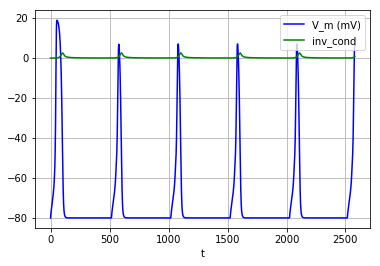

In [6]:
# Вывод всего решения
plt.plot(t_res, sol_res[:, 0], 'b', label='V_m (mV)')
plt.plot(t_res, sol_res[:, 1], 'g', label='inv_cond ')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

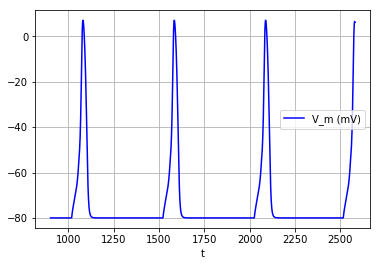

In [7]:
# Вывод последнего ПД
plt.plot(t_res[3500:], sol_res[3500:, 0], 'b', label='V_m (mV)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [8]:
def calculate_AP_heigth(time, V_m):
    return V_m.max() - V_m.min()

def calculate_APD90(time, V_m):
    
    max_ = V_m.max()
    min_ = V_m.min()
    
    apd90_threshold = (max_ - min_)*(1-0.9) + min_
    idx_set = np.where(V_m > apd90_threshold)[0]
    apd90 = time[idx_set[-1]] - time[idx_set[0]]
    
    return apd90

In [9]:
print(calculate_AP_heigth(t_res[3500:], sol_res[3500:, 0]), "mV")
print(calculate_APD90(t_res[3500:], sol_res[3500:, 0]), "ms")

87.10439692956838 mV
1543.3560000000002 ms


In [10]:
XY = [t_res,sol_res[:,0]]

In [11]:
ParamAP(XY)

>> PLOTTING... 								   [OK]
>> SETTING... 								   [OK]
>> FILTERING... 							   [OK]
>> SEARCHING... 							   [OK]
>> REDUCING... 								   [OK]
>> PLOTTING... 								   [OK]
>> SAVING... 								   [OK]
>> AVERAGING... 							   [OK]
>> ANALYZING... 							   [OK]
>> PLOTTING... 								   [OK]
>> SAVING... 
RUN:	2/2

>> PLOTTING... 								   [OK]
>> SETTING... 								   [OK]
>> FILTERING... 							   [OK]
>> SEARCHING... 							   [OK]
>> REDUCING... 								   [OK]
>> PLOTTING... 								   [OK]
>> SAVING... 								   [OK]
>> AVERAGING... 							   [OK]
>> ANALYZING... 							   [OK]
>> PLOTTING... 								   [OK]
>> SAVING... >> CLEANING... 								   [OK]


[True, 1]

<Figure size 432x288 with 0 Axes>

In [12]:
from IPython.display import IFrame
IFrame("./output.pdf", width=800, height=1000)

In [13]:
F = open('protocol.txt','r') 
F.readlines()

['APs (#): 1\n',
 'FR (AP/min): nan\n',
 'CL (ms): 295.6679999999949\n',
 'DD (ms): 24.50999999999958\n',
 'EDD (ms): 12.125999999999792\n',
 'LDD (ms): 12.383999999999787\n',
 'APD (ms): 271.15799999999535\n',
 'APD50 (ms): 32.76599999999944\n',
 'APD90 (ms): 75.8519999999987\n',
 'MDP1 (mV): -79.9999999666579\n',
 'MDP2 (mV): -80.00000000676332\n',
 'THR (mV): -68.10890046996843\n',
 'PP (mV): 6.941896388439068\n',
 'APA (mV): 86.94189639520238\n',
 'DDR (mV/ms): 0.45176110829738536\n',
 'MUV (mV/ms): 5.144030920075631\n',
 'TRR (mV/ms): 0.0\n',
 'MRR (mV/ms): -4.1611108589193\n',
 'APs (#): 1\n',
 'FR (AP/min): nan\n',
 'CL (ms): 306.76199999999477\n',
 'DD (ms): 44.63399999999923\n',
 'EDD (ms): 22.18799999999962\n',
 'LDD (ms): 22.445999999999614\n',
 'APD (ms): 262.1279999999955\n',
 'APD50 (ms): 33.02399999999943\n',
 'APD90 (ms): 75.85199999999871\n',
 'MDP1 (mV): -80.00000000052441\n',
 'MDP2 (mV): -80.00000000324776\n',
 'THR (mV): -66.18992192416864\n',
 'PP (mV): 7.10147699